In [78]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Problem 1

In [2]:
current_date = datetime(2023, 3, 3)
expiration_date = datetime(2023, 3, 17)
time_to_maturity = (expiration_date - current_date).days

print(f"Time to maturity: {time_to_maturity} calendar days")

Time to maturity: 14 calendar days


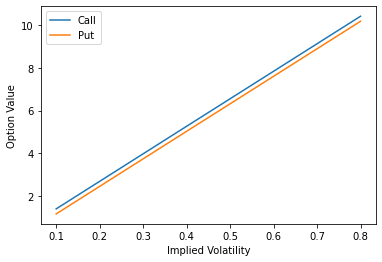

In [3]:
import numpy as np
from scipy.stats import norm

# Define parameters
S = 165
K = 165
r = 0.0425
q = 0.0053
T = time_to_maturity / 365
N = 1000
sigma_range = np.linspace(0.1, 0.8, N)

# Define Black-Scholes call and put functions
def bs_call(S, K, r, q, T, sigma):
    d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    return S * np.exp(-q * T) * Nd1 - K * np.exp(-r * T) * Nd2

def bs_put(S, K, r, q, T, sigma):
    d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = norm.cdf(-d1)
    Nd2 = norm.cdf(-d2)
    return K * np.exp(-r * T) * Nd2 - S * np.exp(-q * T) * Nd1

# Calculate call and put values for range of volatilities
call_values = []
put_values = []
for sigma in sigma_range:
    call_values.append(bs_call(S, K, r, q, T, sigma))
    put_values.append(bs_put(S, K, r, q, T, sigma))

# Plot call and put values against implied volatility
import matplotlib.pyplot as plt

plt.plot(sigma_range, call_values, label='Call')
plt.plot(sigma_range, put_values, label='Put')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Value')
plt.legend()
plt.show()


# Problem2

In [94]:
# Load options data from CSV file
options = pd.read_csv('AAPL_Options.csv')

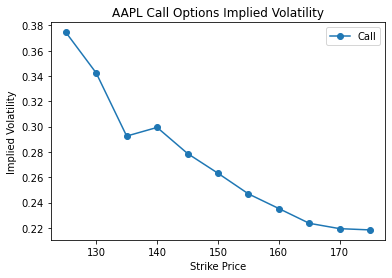

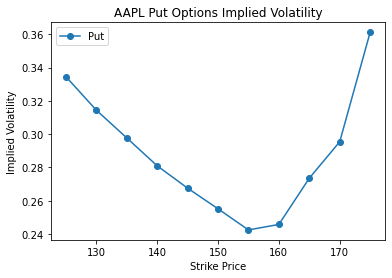

In [7]:
# Define parameters
S = 151.03
r = 0.0425
q = 0.0053
T = (pd.to_datetime('2023-04-21') - pd.to_datetime('2023-03-03')).days / 365

# Define Black-Scholes call and put functions
def bs_call(S, K, r, q, T, sigma):
    d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    return S * np.exp(-q * T) * Nd1 - K * np.exp(-r * T) * Nd2

def bs_put(S, K, r, q, T, sigma):
    d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    Nd1 = norm.cdf(-d1)
    Nd2 = norm.cdf(-d2)
    return K * np.exp(-r * T) * Nd2 - S * np.exp(-q * T) * Nd1

# Define function to calculate implied volatility using Newton-Raphson method
def implied_volatility(price, S, K, r, q, T, option_type):
    def f(sigma):
        if option_type == 'Call':
            return bs_call(S, K, r, q, T, sigma) - price
        elif option_type == 'Put':
            return bs_put(S, K, r, q, T, sigma) - price
    def fprime(sigma):
        d1 = (np.log(S/K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        return S * np.sqrt(T) * np.exp(-q * T) * norm.pdf(d1)
    sigma = 0.5
    for i in range(100):
        sigma = sigma - f(sigma) / fprime(sigma)
    return sigma

# Calculate implied volatility for each option
options['Implied Volatility'] = options.apply(lambda row: implied_volatility(row['Last Price'], S, row['Strike'], r, q, T, row['Type']), axis=1)

# Separate call and put options data
calls = options[options['Type'] == 'Call']
puts = options[options['Type'] == 'Put']

# Plot implied volatility vs strike price for call options
plt.plot(calls['Strike'], calls['Implied Volatility'], 'o-', label='Call')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('AAPL Call Options Implied Volatility')
plt.legend()
plt.show()

# Plot implied volatility vs strike price for put options
plt.plot(puts['Strike'], puts['Implied Volatility'], 'o-', label='Put')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('AAPL Put Options Implied Volatility')
plt.legend()
plt.show()


# Problem 3

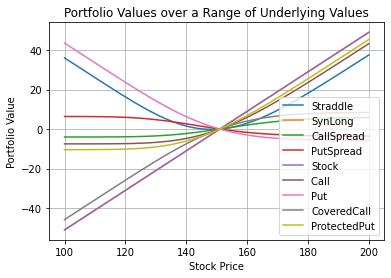

In [4]:
def black_scholes_call(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

data = pd.read_csv('problem3.csv')

# Constants
S0 = 151.03
r = 0.0425
q = 0.0053
sigma = 0.3
current_date = pd.to_datetime('03/03/2023')
expiration_date = pd.to_datetime('04/21/2023')
T = (expiration_date - current_date).days / 365

# Calculate option values
data['OptionValue'] = 0
data.loc[data['OptionType'] == 'Call', 'OptionValue'] = data.loc[data['OptionType'] == 'Call'].apply(
    lambda row: black_scholes_call(S0, row['Strike'], T, r, q, sigma), axis=1
)
data.loc[data['OptionType'] == 'Put', 'OptionValue'] = data.loc[data['OptionType'] == 'Put'].apply(
    lambda row: black_scholes_put(S0, row['Strike'], T, r, q, sigma), axis=1
)

# Calculate portfolio values for a range of underlying values
stock_prices = np.linspace(100, 200, 100)
portfolio_values = {}

for portfolio in data['Portfolio'].unique():
    portfolio_positions = data[data['Portfolio'] == portfolio]
    portfolio_values[portfolio] = []

    for S in stock_prices:
        portfolio_value = 0

        for _, position in portfolio_positions.iterrows():
            if position['Type'] == 'Stock':
                portfolio_value += position['Holding'] * (S - S0)
            elif position['OptionType'] == 'Call':
                portfolio_value += position['Holding'] * (black_scholes_call(S, position['Strike'], T, r, q, sigma) - position['OptionValue'])
            elif position['OptionType'] == 'Put':
                portfolio_value += position['Holding'] * (black_scholes_put(S, position['Strike'], T, r, q, sigma) - position['OptionValue'])

        portfolio_values[portfolio].append(portfolio_value)

# Plot the portfolio values
for portfolio, values in portfolio_values.items():
    plt.plot(stock_prices, values, label=portfolio)

plt.xlabel('Stock Price')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Values over a Range of Underlying Values')
plt.legend()
plt.grid()
plt.show()


## Problem 3(b)

In [9]:
# Read the data
data = pd.read_csv('DailyPrices.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [95]:

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


current_date = datetime.strptime('03/03/2023', '%m/%d/%Y')
rf_rate = 0.0425
continuous_coupon = 0.0053


options_data = pd.read_csv('problem3.csv')
daily_prices = pd.read_csv('DailyPrices.csv', index_col=0, parse_dates=True)

log_returns = np.log(daily_prices / daily_prices.shift(1)).dropna()
log_returns = log_returns - log_returns.mean()

# Fit an AR(1) model using linear regression
X = log_returns[:-1].values.reshape(-1, 1)
y = log_returns[1:].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

# Simulate AAPL returns 10 days ahead
simulated_returns = []
for _ in range(10):
    next_return = reg.predict(np.array([y[-1]]))
    simulated_returns.append(next_return[0, 0])
    y = np.append(y, next_return, axis=0)

future_prices = 151.03 * np.exp(np.cumsum(simulated_returns))

options_data['DaysToExpiration'] = (pd.to_datetime(options_data['ExpirationDate'], format='%m/%d/%Y') - current_date).dt.days
# Define function to calculate implied volatility
def implied_volatility(target_price, flag, S, K, t, r, q):
    def iv_objective_function(sigma):
        return target_price - black_scholes_merton(flag, S, K, t, r, sigma, q)

    return newton(iv_objective_function, 0.2)  # Using an initial guess of 0.2


# Calculate the implied volatility for each option
options_data['ImpliedVolatility'] = options_data.apply(lambda row: implied_volatility(row['CurrentPrice'], 'c' if row['OptionType'] == 'Call' else 'p', current_price, row['Strike'], time_to_expiry, risk_free_rate, 0) if row['Type'] == 'Option' else None, axis=1)

options_data['OptionValue'] = options_data.apply(
    lambda row: black_scholes_call(151.03, row['Strike'], row['DaysToExpiration'] / 365, rf_rate - continuous_coupon, row['ImpliedVolatility']) if row['OptionType'] == 'Call' else black_scholes_put(151.03, row['Strike'], row['DaysToExpiration'] / 365, rf_rate - continuous_coupon, row['ImpliedVolatility']),
    axis=1
)

options_data['PnL'] = options_data.apply(
    lambda row: (np.array(future_prices) - row['CurrentPrice']) * row['Holding'] if row['Type'] == 'Stock' else (
        (black_scholes_call(np.array(future_prices), row['Strike'], (row['DaysToExpiration'] - 10) / 365, rf_rate - continuous_coupon, row['ImpliedVolatility']) if row['OptionType'] == 'Call' else black_scholes_put(np.array(future_prices), row['Strike'], (row['DaysToExpiration'] - 10) / 365, rf_rate - continuous_coupon, row['ImpliedVolatility'])) - row['OptionValue']
    ) * row['Holding'],
    axis=1
)

portfolio_pnl = options_data.groupby('Portfolio')['PnL'].apply(lambda x: np.sum(np.vstack(x), axis=0))
results = pd.DataFrame(columns=['Mean', 'VaR', 'ES'], index=portfolio_pnl.index)

for portfolio in portfolio_pnl.index:
    pnl = portfolio_pnl.loc[portfolio]
    mean_pnl = np.mean(pnl)
    var_95 = np.percentile(pnl, 5)
    es_95 = np.mean(pnl[pnl <= var_95])
    
    results.loc[portfolio, 'Mean'] = mean_pnl
    results.loc[portfolio, 'VaR'] = var_95
    results.loc[portfolio, 'ES'] = es_95

results

,Mean,VaR,ES
Portfolio,,,
Call,-0.728407,-0.751579,-0.75415
CallSpread,-0.217952,-0.230816,-0.232245
CoveredCall,0.603106,0.578726,0.576012
ProtectedPut,-0.540134,-0.569171,-0.572394
Put,-0.523513,-0.541286,-0.543233
PutSpread,-0.102662,-0.112985,-0.114117
Stock,-0.045546,-0.08655,-0.091107
Straddle,-1.25192,-1.257274,-1.257861
SynLong,-0.204894,-0.245883,-0.250438
